In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
from datetime import datetime
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import re

In [3]:
sns.set_style("whitegrid")

In [4]:
df = pickle.load(open("df.pkl", 'rb'))

In [5]:
df.shape

(1151695, 35)

In [6]:
def get_bedrooms(housing):
    """parse amount of bedrooms from 'housing' field"""
    bedrooms = None
    # bedrooms
    match = re.search(r'(\d+)br.*', housing)
    if match:
        bedrooms = int(match.group(1))
    return bedrooms

In [7]:
df.dropna(subset=['parsed_price', "parsed_housing"], inplace=True)

In [8]:
df["price"] = df["parsed_price"].apply(float)

In [9]:
df['bedrooms'] = df["parsed_housing"].apply(get_bedrooms)

In [10]:
df.head()

,parsed_map_address,parsed_postingtitletext,added,PostUrl,PostTitle,parsed_price,parsed_price_text,parsed_housing,PostContent,parsed_data_longitude,...,parsed_wd,parsed_type,parsed_laundryb,parsed_nthumbs,parsed_garagea,parsed_laundrys,parsed_garaged,parsed_catsok,price,bedrooms
0,(google map),$1500 / 1br - Brand New Rm w/ Private Bath (6 ...,1530234542656,https://sfbay.craigslist.org/sby/apa/d/brand-n...,simulated,1500,$1500,1br,simulated,-121.85679,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.0,1.0
2,(google map),$1500 / 1br - 600ft2 - 1br/1bd APARTMENT/IN-LA...,1578550939698,https://sfbay.craigslist.org/sby/apa/d/san-jos...,simulated,1500,$1500,1br - 600ft2,simulated,-121.782015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1500.0,1.0
3,909 Lake Tahoe Ct,$3259 / 3br - 1205ft2 - A resort style living ...,1534279609329,https://sfbay.craigslist.org/sby/apa/d/resort-...,A resort style living everyday! Truly beauti...,3259,$3259,3br - 1205ft2,https://www.youtube.com/watch?v=Oyoa2rKhUY0 \n...,-121.867368,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3259.0,3.0
4,1025 Sutter Street,$3395 / 1br - Click Bait Apartment in Alamo Sq...,1533671211044,https://sfbay.craigslist.org/sfc/apa/d/click-b...,Click Bait Apartment in Alamo Square (lower no...,3395,$3395,1br,"Click Bait Apartment in Alamo Square \n$3,395 ...",-122.41742,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3395.0,1.0
5,Oakside Ave,$2625 / 2br - 800ft2 - Moving Special!!Hampshi...,1537829212161,https://sfbay.craigslist.org/pen/apa/d/moving-...,Moving Special!!Hampshire Apt. 2 Bed 1 Bath Ap...,2625,$2625,2br - 800ft2,Beautiful 2 Bed Apartment - Quiet Redwood City...,-122.206378,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2625.0,2.0


In [11]:
df.columns

Index(['parsed_map_address', 'parsed_postingtitletext', 'added', 'PostUrl',
       'PostTitle', 'parsed_price', 'parsed_price_text', 'parsed_housing',
       'PostContent', 'parsed_data_longitude', 'parsed_attrs',
       'parsed_district', 'parsed_map_link', 'parsed_bedrooms',
       'parsed_postingbody', 'parsed_page_head', 'parsed_thumbs', 'FeedTitle',
       'intid', 'parsed_titletextonly', 'parsed_data_latitude', 'FeedUrl',
       'PostPublished', 'parsed_notices', 'parsed_dogsok', 'parsed_area',
       'parsed_furnished', 'parsed_wd', 'parsed_type', 'parsed_laundryb',
       'parsed_nthumbs', 'parsed_garagea', 'parsed_laundrys', 'parsed_garaged',
       'parsed_catsok', 'price', 'bedrooms'],
      dtype='object')

In [12]:
# cleanup duplicates
# do not include next columns
# intid - uniq id
# added -  may be added different time
# PostUrl - may use different urls
# parsed_thumbs - lists are unhashable
# parsed_attrs - lists are unhashable
# parsed_notices - lists are unhashable

df.drop_duplicates(subset=[
    'parsed_map_address',
    'parsed_postingtitletext', 
    'parsed_price', 
    'parsed_housing',
    'parsed_data_longitude',
    'parsed_district',
    'parsed_map_link',
    'parsed_bedrooms',
    'parsed_postingbody',
    'parsed_page_head',
    'parsed_titletextonly', 
    'parsed_data_latitude',
    'parsed_dogsok', 
    'parsed_area',
    'parsed_furnished',
    'parsed_wd',
    'parsed_type',
    'parsed_laundryb',
    'parsed_nthumbs',
    'parsed_garagea',
    'parsed_laundrys',
    'parsed_garaged',
    'parsed_catsok',
])
df.shape

(1089782, 37)

In [13]:
df.dropna(subset=["bedrooms"], inplace=True)

In [14]:
df.shape

(1016958, 37)

In [15]:
pdf = df.loc[:, ["added", "price", "bedrooms", "parsed_district"]]

In [16]:
del df

In [17]:
pdf.describe()

,price,bedrooms
count,1.016958e+06,1.016958e+06
mean,2.949974e+14,1.866169e+00
std,2.974882e+17,9.569109e-01
min,0.000000e+00,1.000000e+00
25%,2.198000e+03,1.000000e+00
50%,2.750000e+03,2.000000e+00
75%,3.571000e+03,2.000000e+00
max,3.000000e+20,1.230000e+02


In [18]:
pdf["bedrooms"].unique()

array([  1.,   3.,   2.,   6.,   4.,   5.,   7.,   8., 123.])

In [19]:
def stodatetime(s):
    return datetime.utcfromtimestamp(int(s)/1000)

In [20]:
pdf.loc[:,"time"] = pdf["added"].apply(stodatetime)

In [21]:
pdf.describe()

,price,bedrooms
count,1.016958e+06,1.016958e+06
mean,2.949974e+14,1.866169e+00
std,2.974882e+17,9.569109e-01
min,0.000000e+00,1.000000e+00
25%,2.198000e+03,1.000000e+00
50%,2.750000e+03,2.000000e+00
75%,3.571000e+03,2.000000e+00
max,3.000000e+20,1.230000e+02


In [22]:
now = datetime.utcnow()
def days_ago(t):
    delta = now - t
    return -1 * delta.days

def weeks_ago(t):
    return days_ago(t) // 7

def months_ago(t):
    return days_ago(t) // 30

In [23]:
pdf["days_ago"] = pdf["time"].apply(days_ago)

In [24]:
pdf["weeks_ago"] = pdf["time"].apply(weeks_ago)

In [25]:
pdf["months_ago"] = pdf["time"].apply(months_ago)

In [26]:
pdf.describe()

,price,bedrooms,days_ago,weeks_ago,months_ago
count,1.016958e+06,1.016958e+06,1.016958e+06,1.016958e+06,1.016958e+06
mean,2.949974e+14,1.866169e+00,-2.901644e+02,-4.188048e+01,-1.016444e+01
std,2.974882e+17,9.569109e-01,2.363259e+02,3.376403e+01,7.885916e+00
min,0.000000e+00,1.000000e+00,-8.470000e+02,-1.210000e+02,-2.900000e+01
25%,2.198000e+03,1.000000e+00,-3.720000e+02,-5.400000e+01,-1.300000e+01
50%,2.750000e+03,2.000000e+00,-2.180000e+02,-3.200000e+01,-8.000000e+00
75%,3.571000e+03,2.000000e+00,-1.160000e+02,-1.700000e+01,-4.000000e+00
max,3.000000e+20,1.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00


In [27]:
pdf["price"].describe()

count    1.016958e+06
mean     2.949974e+14
std      2.974882e+17
min      0.000000e+00
25%      2.198000e+03
50%      2.750000e+03
75%      3.571000e+03
max      3.000000e+20
Name: price, dtype: float64

In [28]:
pdf.head()

,added,price,bedrooms,parsed_district,time,days_ago,weeks_ago,months_ago
0,1530234542656,1500.0,1.0,san jose downtown,2018-06-29 01:09:02.656,-793,-114,-27
2,1578550939698,1500.0,1.0,san jose east,2020-01-09 06:22:19.698,-233,-34,-8
3,1534279609329,3259.0,3.0,san jose south,2018-08-14 20:46:49.329,-746,-107,-25
4,1533671211044,3395.0,1.0,lower nob hill,2018-08-07 19:46:51.044,-753,-108,-26
5,1537829212161,2625.0,2.0,redwood city,2018-09-24 22:46:52.161,-705,-101,-24


In [29]:
pdf.loc[:,"bedrooms_str"] = pdf["bedrooms"].apply(lambda x: f"{int(x)}br")

In [30]:
pdf["bedrooms_str"]

0          1br
2          1br
3          3br
4          1br
5          2br
          ... 
1151690    1br
1151691    2br
1151692    1br
1151693    2br
1151694    1br
Name: bedrooms_str, Length: 1016958, dtype: object

In [31]:
acc = pdf[(pdf["days_ago"] >- 300) & (pdf["price"] < 8000) & (pdf["bedrooms"] <= 3)]

In [32]:
acc.shape

(673436, 9)

In [33]:
acc.describe()

,price,bedrooms,days_ago,weeks_ago,months_ago
count,673436.000000,673436.000000,673436.000000,673436.000000,673436.000000
mean,2872.754345,1.691721,-156.181339,-22.740177,-5.685493
std,1070.169308,0.708711,84.449415,12.068957,2.809156
min,0.000000,1.000000,-299.000000,-43.000000,-10.000000
25%,2175.000000,1.000000,-229.000000,-33.000000,-8.000000
50%,2695.000000,2.000000,-158.000000,-23.000000,-6.000000
75%,3400.000000,2.000000,-84.000000,-12.000000,-3.000000
max,7999.000000,3.000000,0.000000,0.000000,0.000000


In [34]:
acc["bedrooms_str"].unique()

array(['1br', '3br', '2br'], dtype=object)

In [35]:
#g = sns.relplot(x="days_ago", y="price", kind="line", hue="bedrooms_str", style="bedrooms_str", data=acc);
#g.fig.set_figwidth(12)
#g.fig.set_figheight(5)

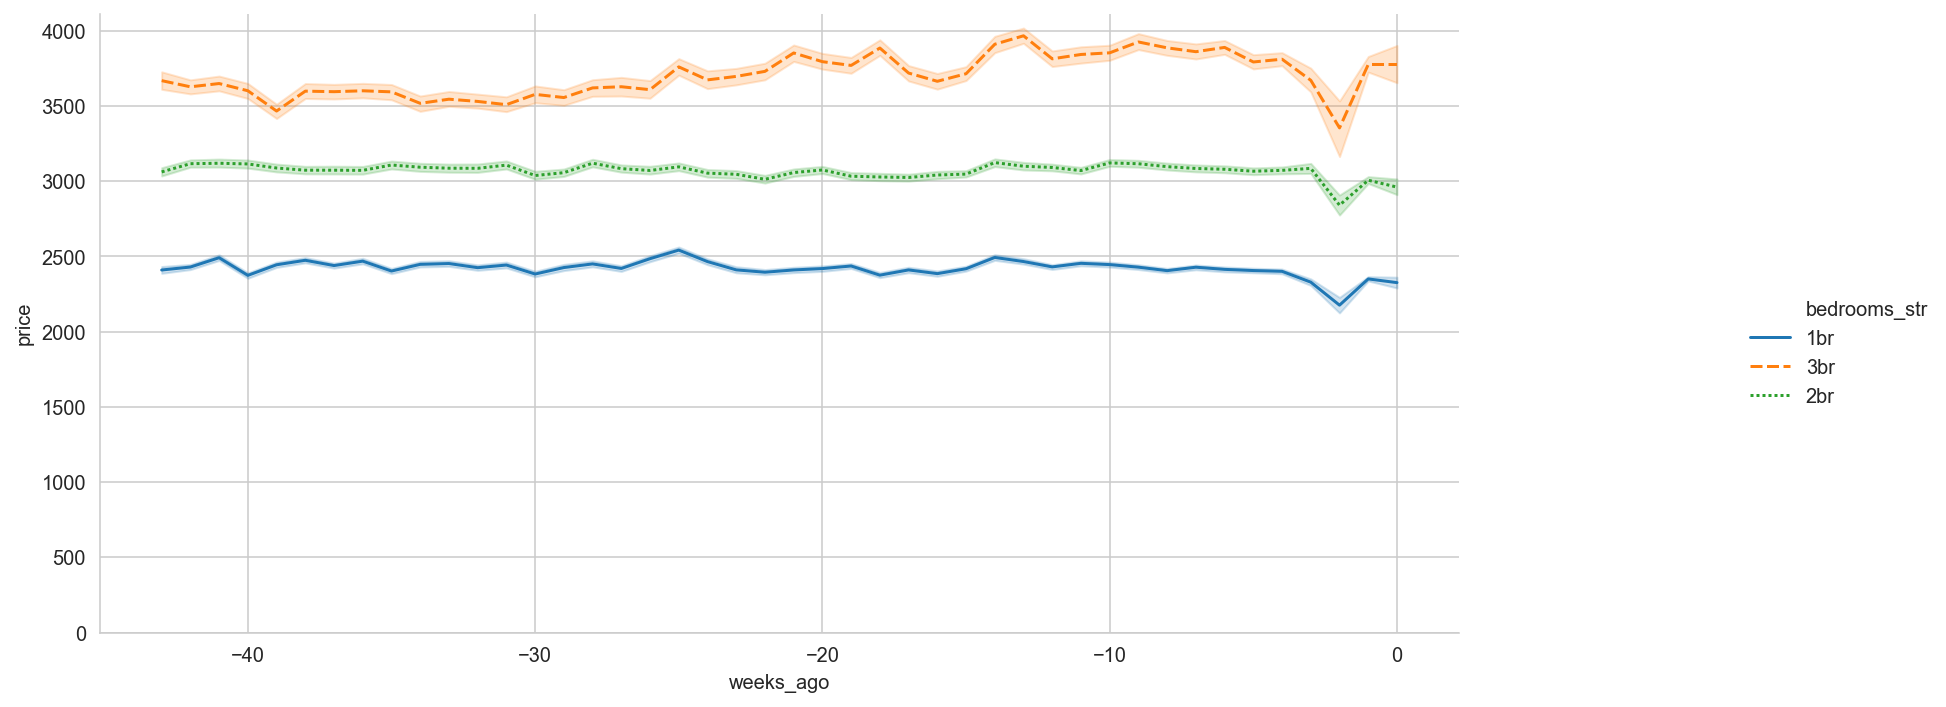

In [36]:
g = sns.relplot(x="weeks_ago", y="price", kind="line", hue="bedrooms_str", style="bedrooms_str", data=acc);
g.fig.set_figwidth(15);
g.fig.set_figheight(5);
g.set(ylim=(0, None));

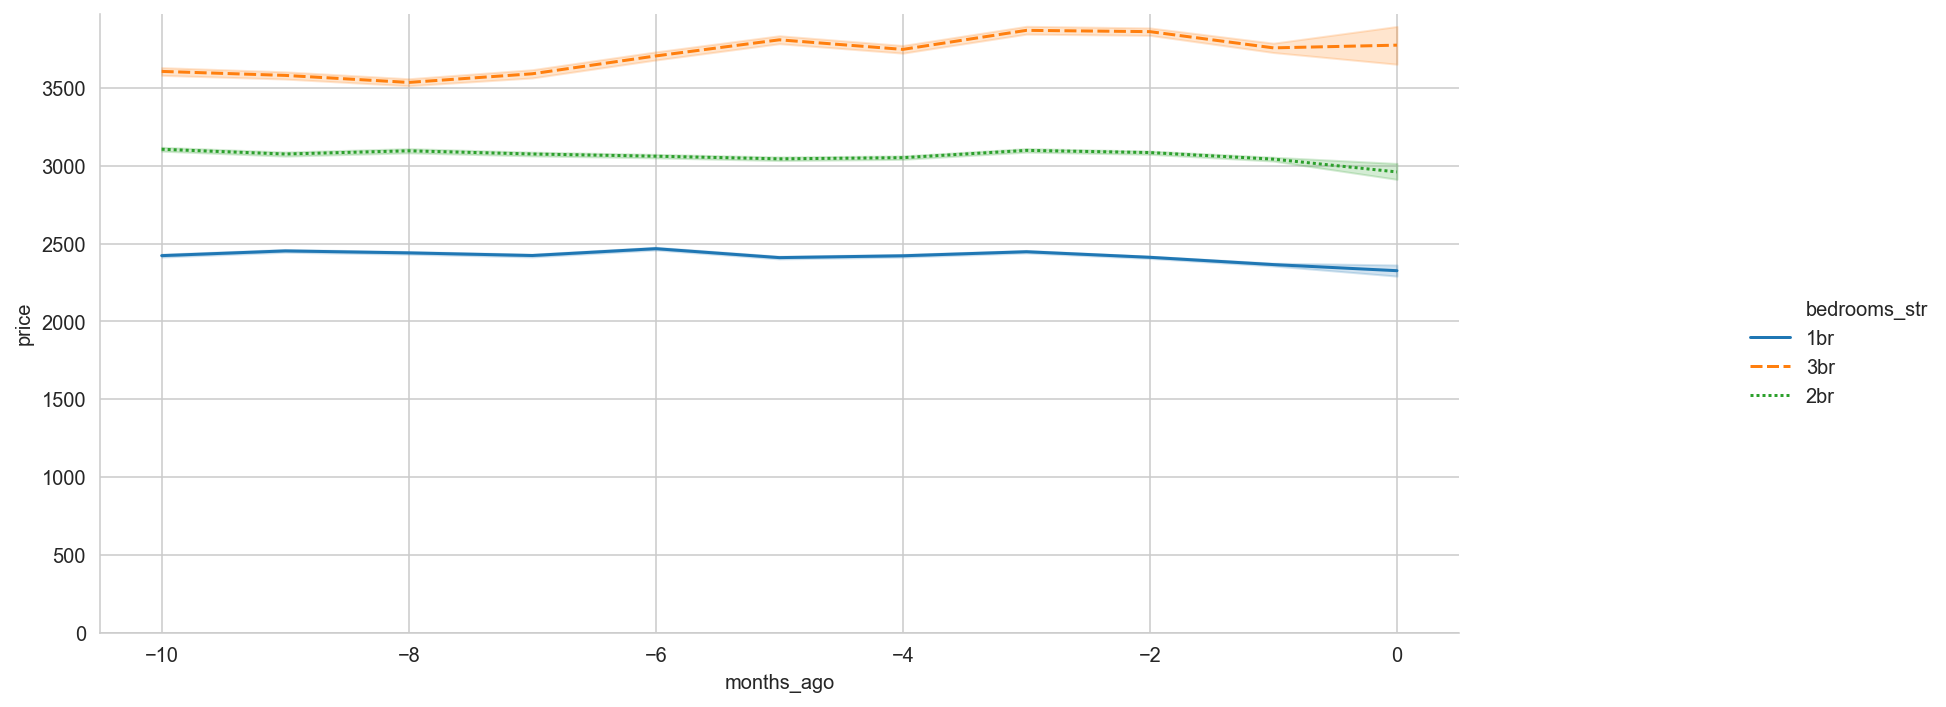

In [37]:
g = sns.relplot(x="months_ago", y="price", kind="line", hue="bedrooms_str", style="bedrooms_str", data=acc);
g.fig.set_figwidth(15);
g.fig.set_figheight(5);
g.set(ylim=(0, None));

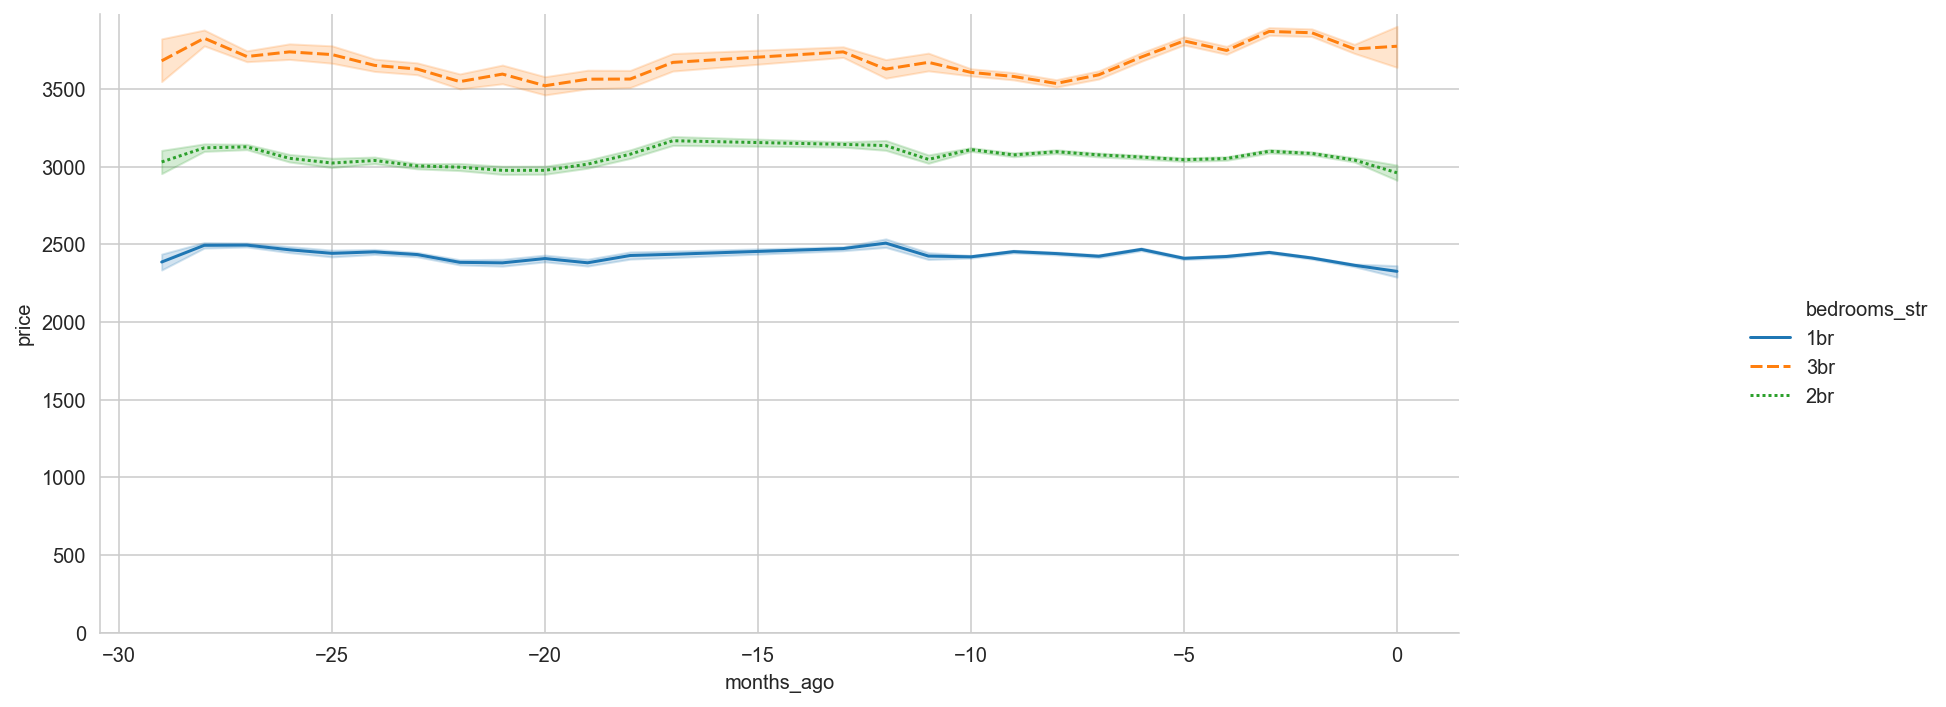

In [38]:
dag_data = pdf[(pdf["price"] < 8000) & (pdf["bedrooms"] <= 3)]

g = sns.relplot(x="months_ago", y="price", kind="line", hue="bedrooms_str", style="bedrooms_str", data=dag_data);
g.fig.set_figwidth(15);
g.fig.set_figheight(5);
g.set(ylim=(0, None));

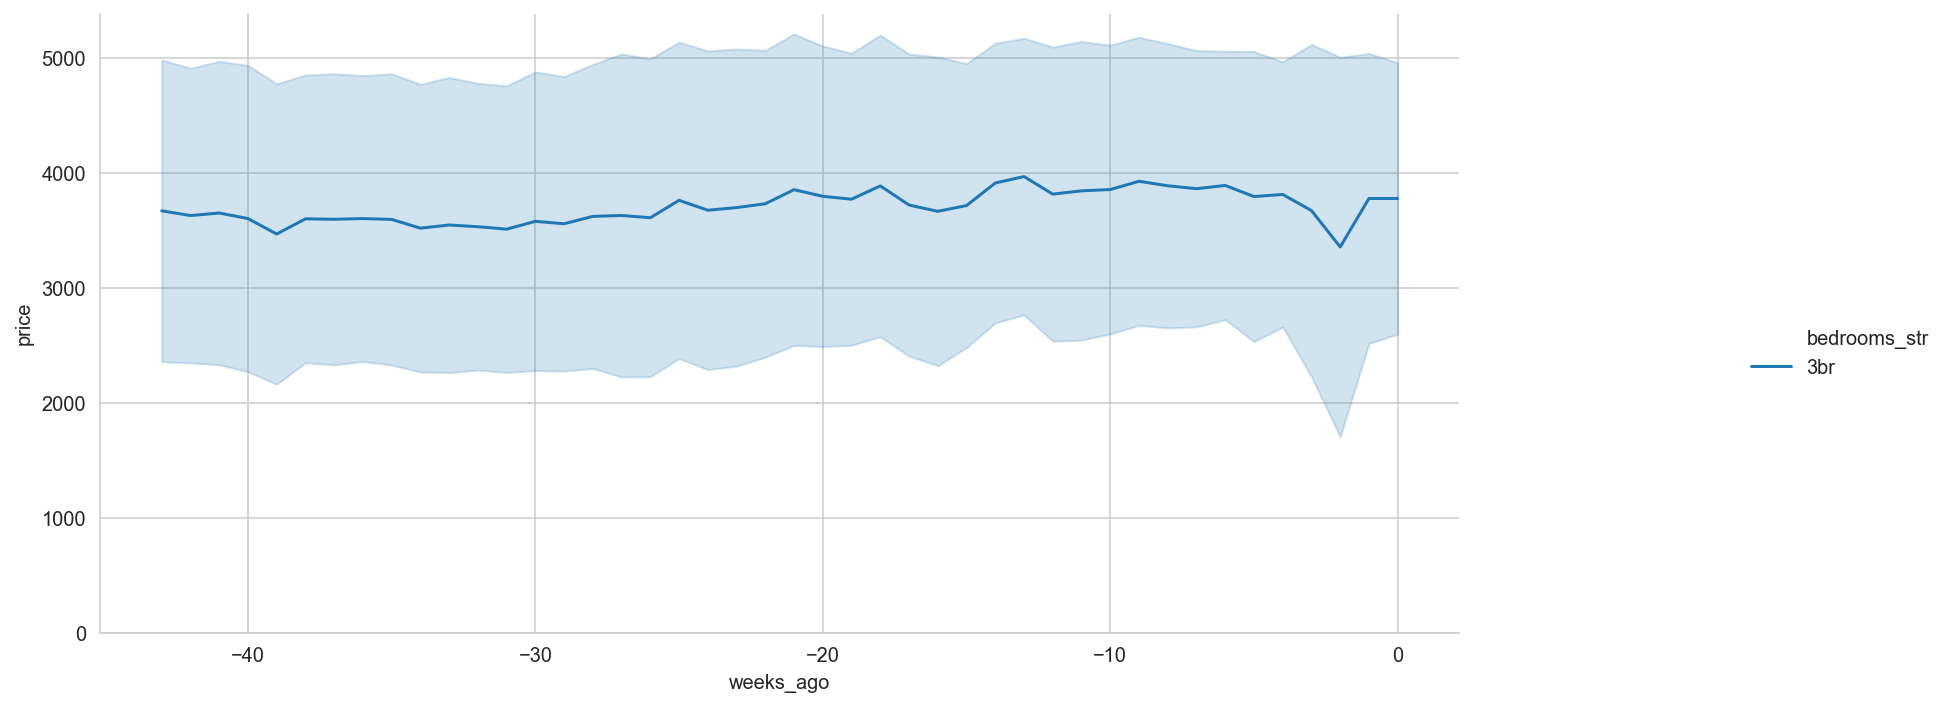

In [39]:
g = sns.relplot(x="weeks_ago", y="price", kind="line", hue="bedrooms_str", ci="sd", 
                data=acc[acc["bedrooms_str"]=="3br"])
g.fig.set_figwidth(15)
g.fig.set_figheight(5)
g.set(ylim=(0, None));

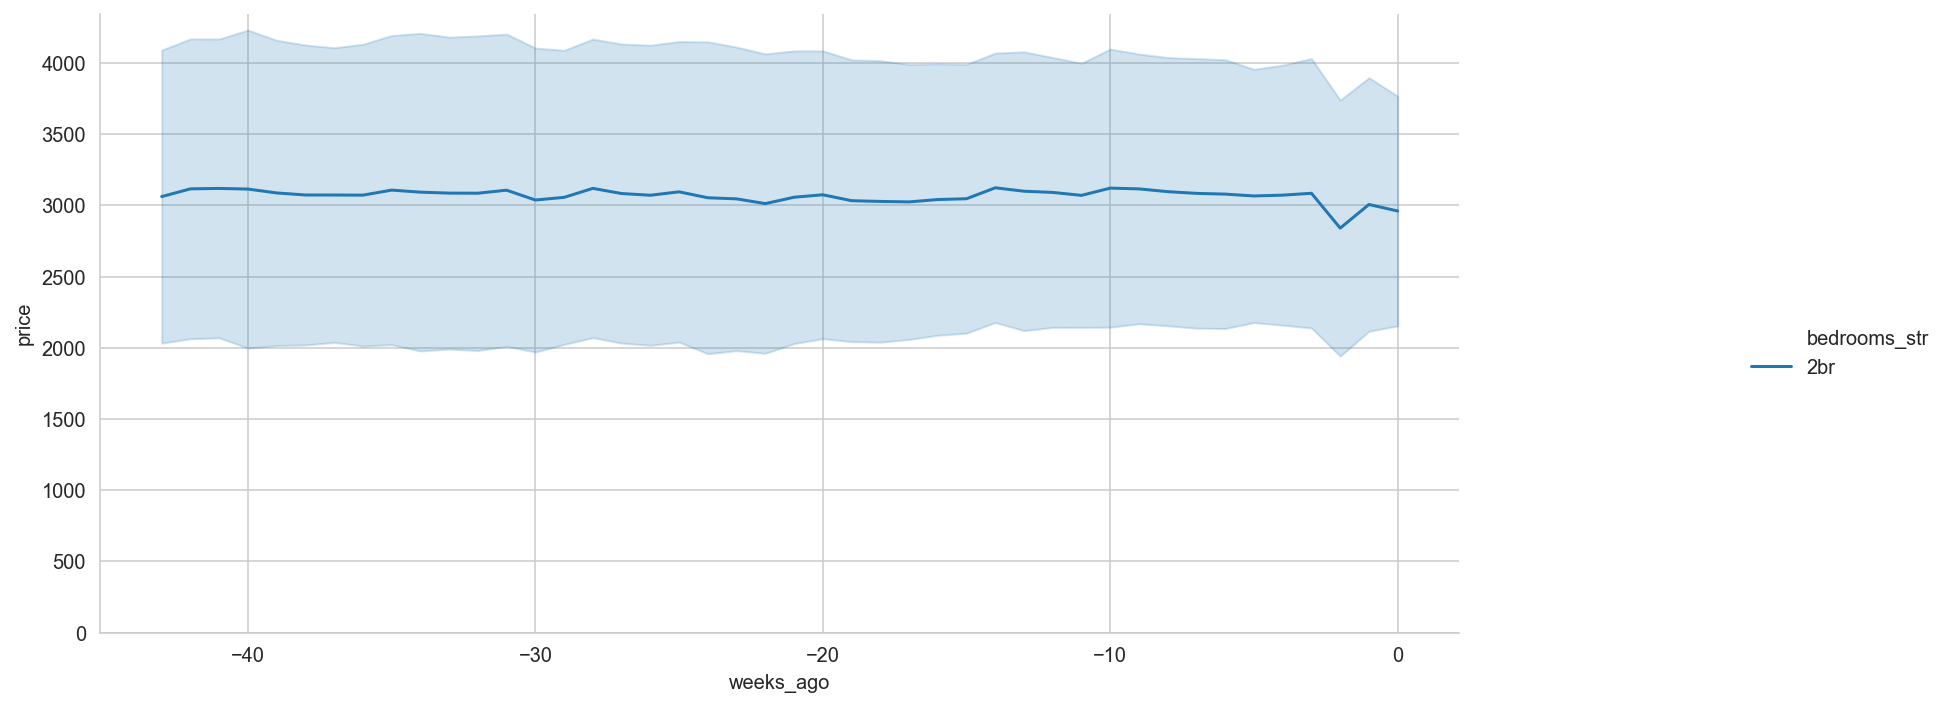

In [40]:
g = sns.relplot(x="weeks_ago", y="price", kind="line", hue="bedrooms_str", ci="sd", 
                data=acc[acc["bedrooms_str"]=="2br"])
g.fig.set_figwidth(15)
g.fig.set_figheight(5)
g.set(ylim=(0, None));

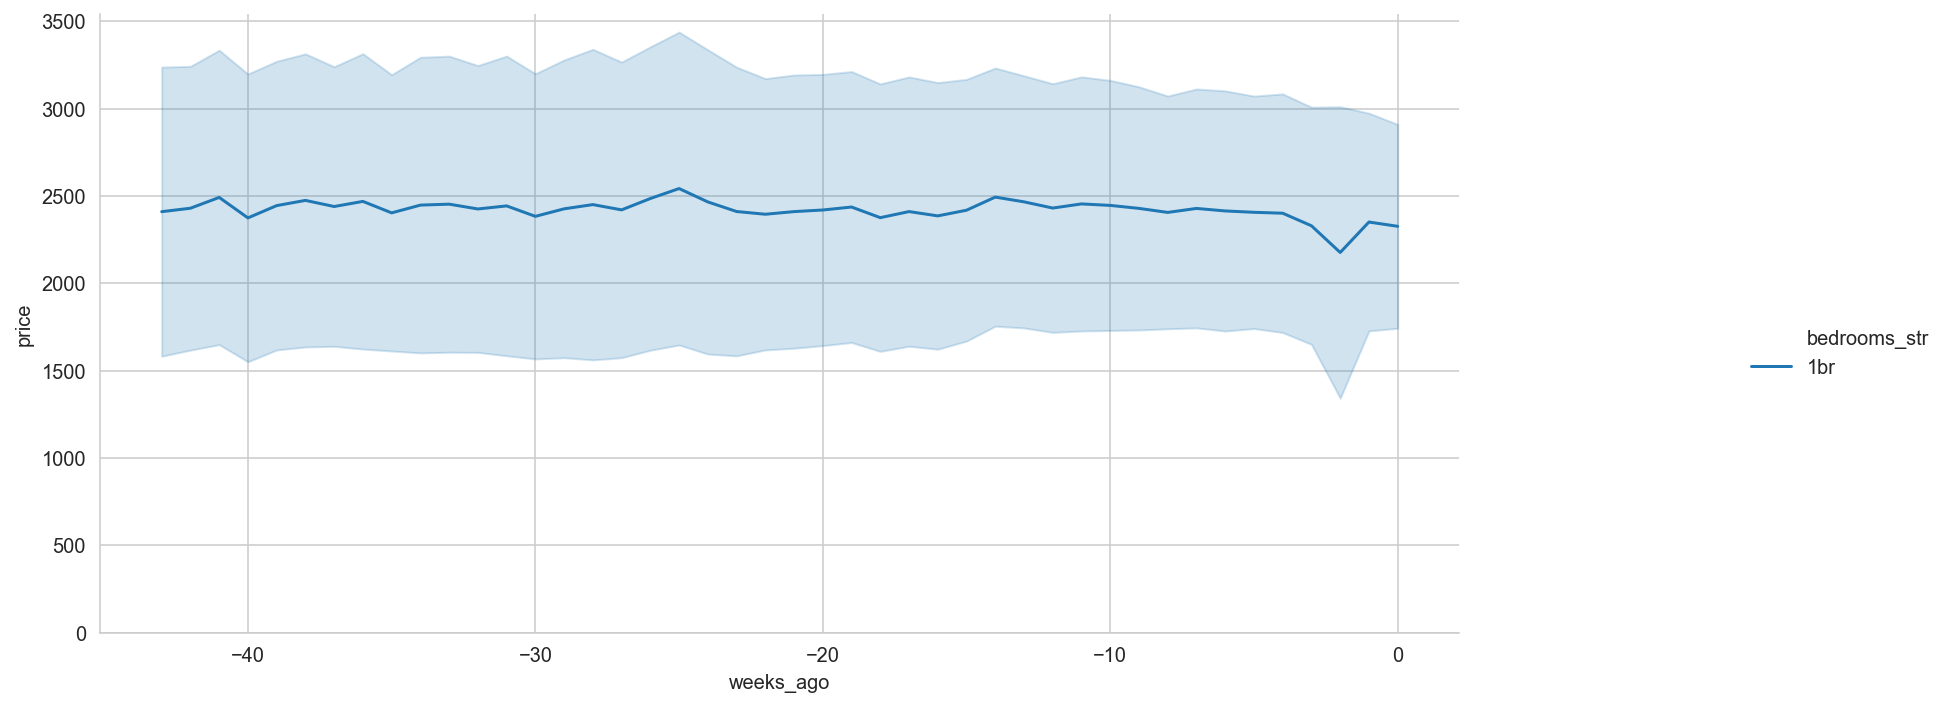

In [41]:
g = sns.relplot(x="weeks_ago", y="price", kind="line", hue="bedrooms_str", ci="sd", 
                data=acc[acc["bedrooms_str"]=="1br"])
g.fig.set_figwidth(15)
g.fig.set_figheight(5)
g.set(ylim=(0, None));

<AxesSubplot:xlabel='days_ago'>

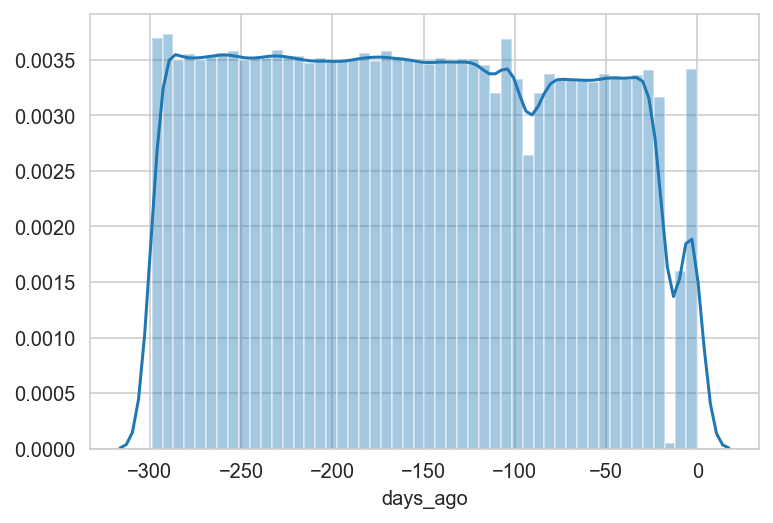

In [42]:
sns.distplot(acc["days_ago"])

<AxesSubplot:xlabel='weeks_ago'>

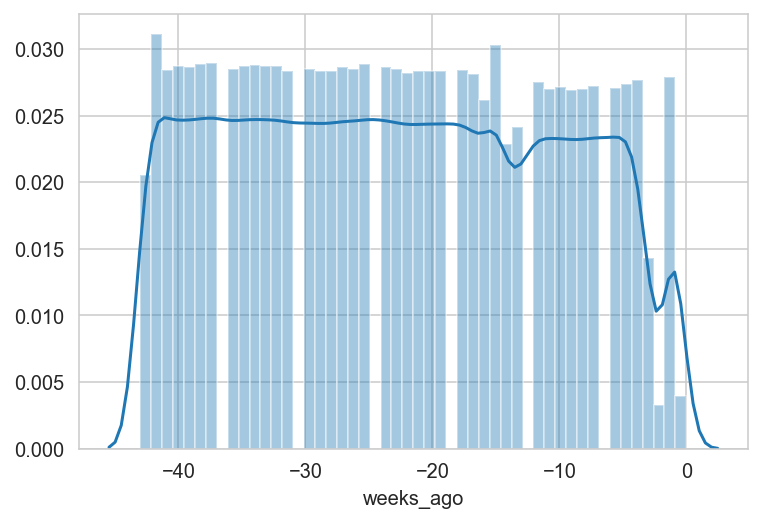

In [43]:
sns.distplot(acc["weeks_ago"])

<AxesSubplot:xlabel='months_ago'>

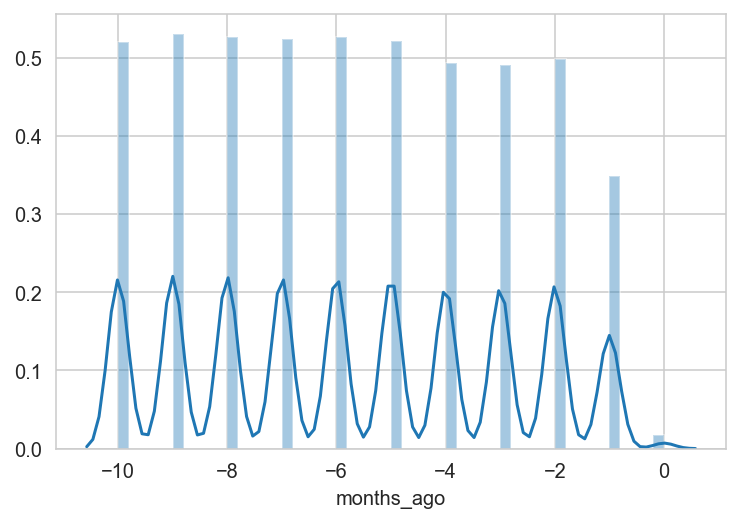

In [44]:
sns.distplot(acc["months_ago"])

In [45]:
acc["parsed_district"].describe()

count       658405
unique        2723
top       berkeley
freq         24242
Name: parsed_district, dtype: object